In [5]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")  # Suppress warning messages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Function to plot time series with labels
def plot_timeseries(series, title, xlabel='Date', ylabel='Value', figsize=(10, 4)):
    plt.figure(figsize=figsize)
    plt.plot(series, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

Dataset head:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


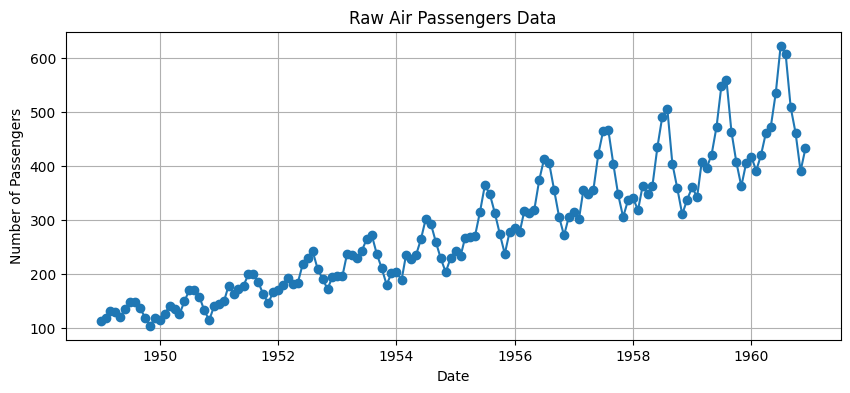

In [6]:
# Load the Air Passengers dataset from GitHub
data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(data_url)

# Convert 'Month' column to datetime and set it as the index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.columns = ['Passengers']  # Rename the column for clarity

# Display the first few rows of the dataset
print("Dataset head:")
print(df.head())

# Visualization 1: Plot the raw time series data
plot_timeseries(df['Passengers'], title='Raw Air Passengers Data', ylabel='Number of Passengers')

In [17]:
# Compute the first-order difference
diff_series = df['Passengers'].diff().dropna()
# Build and fit the ARIMA model
# Using ARIMA(1, 1, 1) as an example. In practice, use tests (ADF, ACF/PACF) to choose parameters.
arima_order = (1, 1, 1)
model = ARIMA(df['Passengers'], order=arima_order)
model_fit = model.fit()

# Print summary of the model for diagnostics
print("ARIMA Model Summary:")
print(model_fit.summary())

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Tue, 15 Apr 2025   AIC                           1394.683
Time:                        08:34:26   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.43

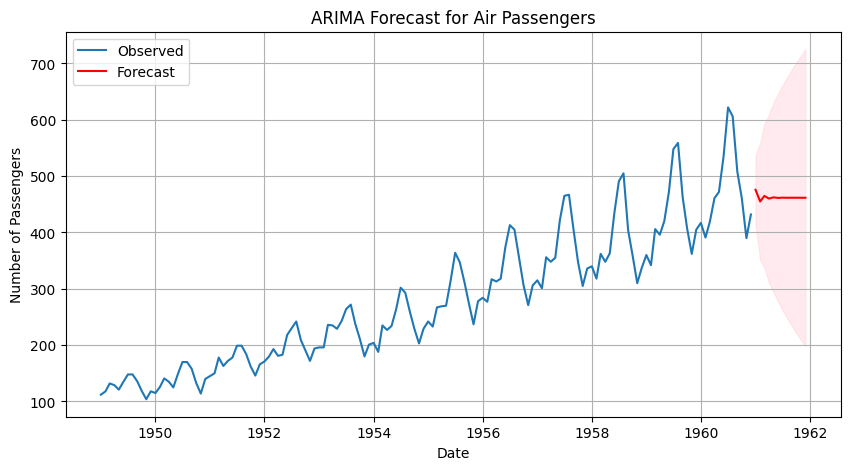

In [10]:
# Forecast the next 12 months (1 year)
forecast_steps = 12
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast_result.predicted_mean
forecast_conf_int = forecast_result.conf_int()

# Create an index for the forecasted period
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')
forecast_mean.index = forecast_index
forecast_conf_int.index = forecast_index

# Visualization 4: Plot observed data and forecasts together with confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(df['Passengers'], label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('ARIMA Forecast for Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

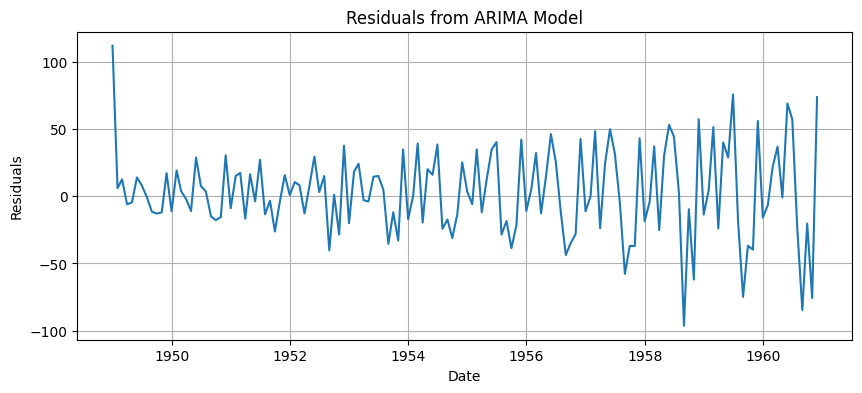

In [13]:
# Visualization 5: Residual Analysis
residuals = model_fit.resid

plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

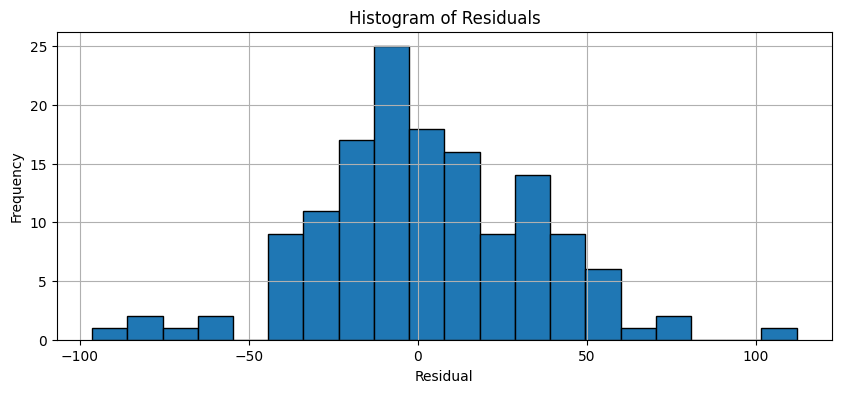

In [14]:
# Histogram of residuals
plt.figure(figsize=(10, 4))
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

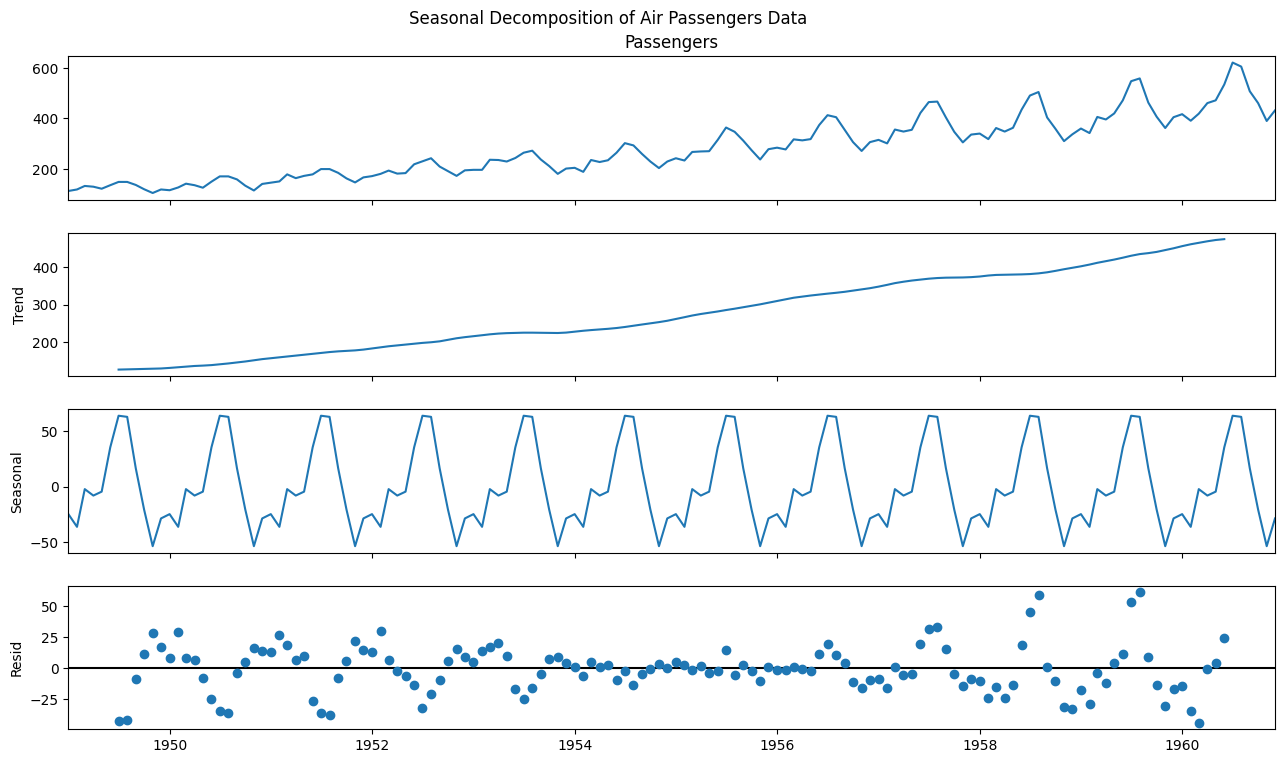

In [15]:
# Visualization 6: Seasonal Decomposition Plot
# Decompose the time series using an additive model.
decomposition = seasonal_decompose(df['Passengers'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.suptitle('Seasonal Decomposition of Air Passengers Data')
plt.show()